# **Clase 1**

1 - La primera etapa en un proyecto de Machine Learning es la obtención de datos. A partir de esta obtención, podemos leer los datos para construir un modelo. Como tarea inicial, realiza la lectura de la base de datos y verifica la presencia de datos nulos. Además, elimina la columna 'id_cliente', ya que este tipo de información única para cada fila no es útil para su uso en modelos de machine learning.

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv("churn.csv")

In [3]:
datos.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             10000 non-null  int64  
 1   score_credito          10000 non-null  int64  
 2   pais                   10000 non-null  str    
 3   sexo_biologico         10000 non-null  str    
 4   edad                   10000 non-null  int64  
 5   años_de_cliente        10000 non-null  int64  
 6   saldo                  10000 non-null  float64
 7   servicios_adquiridos   10000 non-null  int64  
 8   tiene_tarjeta_credito  10000 non-null  int64  
 9   miembro_activo         10000 non-null  int64  
 10  salario_estimado       10000 non-null  float64
 11  churn                  10000 non-null  int64  
dtypes: float64(2), int64(8), str(2)
memory usage: 937.6 KB


In [4]:
datos = datos.drop("id_cliente", axis=1)

In [5]:
datos.head()

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0


2 - Después de leer los datos, es importante conocer los datos, revisando inconsistencias y entendiendo el comportamiento de cada una de las columnas. En esta tarea, realiza un análisis exploratorio utilizando gráficos para las variables categóricas de la base de datos, incluyendo la variable objetivo churn. Para estas variables, se pueden utilizar gráficos de barras para contar las categorías y hacer un agrupamiento por colores de acuerdo con las categorías de la variable objetivo.

In [6]:
import plotly.express as px

In [7]:
px.histogram(datos, x="churn", text_auto=True)

In [8]:
px.histogram(datos, x= "pais", text_auto=True, color="churn", barmode= "group")


In [9]:
px.histogram(datos, x= "sexo_biologico", text_auto=True, color="churn", barmode= "group")

In [10]:
px.histogram(datos, x= "tiene_tarjeta_credito", text_auto=True, color="churn", barmode= "group")

In [11]:
px.histogram(datos, x= "miembro_activo", text_auto=True, color="churn", barmode= "group")

In [12]:
datos.head()

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0


3 - Después de explorar las variables categóricas, es el turno de las variables numéricas. Construye gráficos de distribución como boxplots o histogramas para analizar el comportamiento de los valores numéricos y verificar si hay valores inconsistentes.

In [13]:
px.box(datos, x="score_credito", color= "churn")

In [14]:
px.box(datos, x="edad", color= "churn")

In [15]:
px.box(datos, x="años_de_cliente", color= "churn")

In [16]:
px.box(datos, x="saldo", color= "churn")

In [17]:
px.box(datos, x="servicios_adquiridos", color= "churn")

In [18]:
px.box(datos, x="salario_estimado", color= "churn")

1. Para utilizar los datos en los algoritmos de Machine Learning, necesitamos informar cuáles son las variables explicativas y cuál es la variable objetivo. En este desafío, realiza la separación de la base de datos de churn entre las variables explicativas, almacenando en una variable x y la variable objetivo en y.
2. Las variables categóricas que están en formato de texto no pueden ser utilizadas directamente en los modelos de Machine Learning. En este desafío, realiza la transformación de las variables categóricas al formato numérico utilizando el OneHotEncoder, utilizando el parámetro drop='if_binary' si alguna variable tiene solo 2 categorías.
3. La variable objetivo, como es de tipo categórica, también necesita pasar por un tratamiento similar al de las variables explicativas categóricas para que pueda ser utilizada en los algoritmos. En esta tarea, utiliza el método LabelEncoder para realizar la transformación de la variable churn.

In [19]:
X = datos.drop('churn', axis = 1)
y = datos['churn'] 

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder 

In [21]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['sexo_biologico','pais', 'tiene_tarjeta_credito', 'miembro_activo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [22]:
columnas = X.columns 

In [23]:
X = one_hot.fit_transform(X)

In [24]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
y = label_encoder.fit_transform(y)

1. La separación de los datos entre conjunto de entrenamiento y prueba es esencial para comprender si un modelo está logrando aprender los patrones y generalizar a nuevos datos. En esta tarea, realiza la división de la base de datos entre entrenamiento y prueba de forma estratificada.

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Un modelo base es muy importante para definir un criterio de comparación para modelos más complejos. En esta etapa, crea un modelo base con el DummyClassifier y encuentra la tasa de acierto con el método score.

In [31]:
from sklearn.dummy import DummyClassifier

In [32]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

,"strategy strategy: {""most_frequent"", ""prior"", ""stratified"", ""uniform"", ""constant""}, default=""prior""Strategy to use to generate predictions.* ""most_frequent"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit`. The `predict_proba` method returns the matching one-hot encoded vector.* ""prior"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit` (like ""most_frequent""). ``predict_proba`` always returns the empirical class distribution of `y` also known as the empirical class prior distribution.* ""stratified"": the `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The `predict` method returns the class label which got probability one in the one-hot vector of `predict_proba`. Each sampled row of both methods is therefore independent and identically distributed.* ""uniform"": generates predictions uniformly at random from the list of unique classes observed in `y`, i.e. each class has equal probability.* ""constant"": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class. .. versionchanged:: 0.24 The default value of `strategy` has changed to ""prior"" in version 0.24.",'prior'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness to generate the predictions when``strategy='stratified'`` or ``strategy='uniform'``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"constant constant: int or str or array-like of shape (n_outputs,), default=NoneThe explicit constant as predicted by the ""constant"" strategy. Thisparameter is useful only for the ""constant"" strategy.",None


In [33]:
dummy.score(X_test, y_test)

0.7964

El árbol de decisión es un algoritmo que realiza las clasificaciones a partir de decisiones simples tomadas a partir de los datos. Debemos tener cierto cuidado de no utilizar una profundidad muy grande, porque esto puede provocar un sobreajuste del modelo a los datos de entrenamiento. En este desafío, crea un modelo de árbol de decisión con el parámetro max_depth=4, evalúa el desempeño del modelo en los datos de prueba y visualiza las decisiones del árbol usando el método plot_tree.

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
decision_arbol = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_arbol.fit(X_train, y_train)
decision_arbol.score(X_test, y_test)

0.8552

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

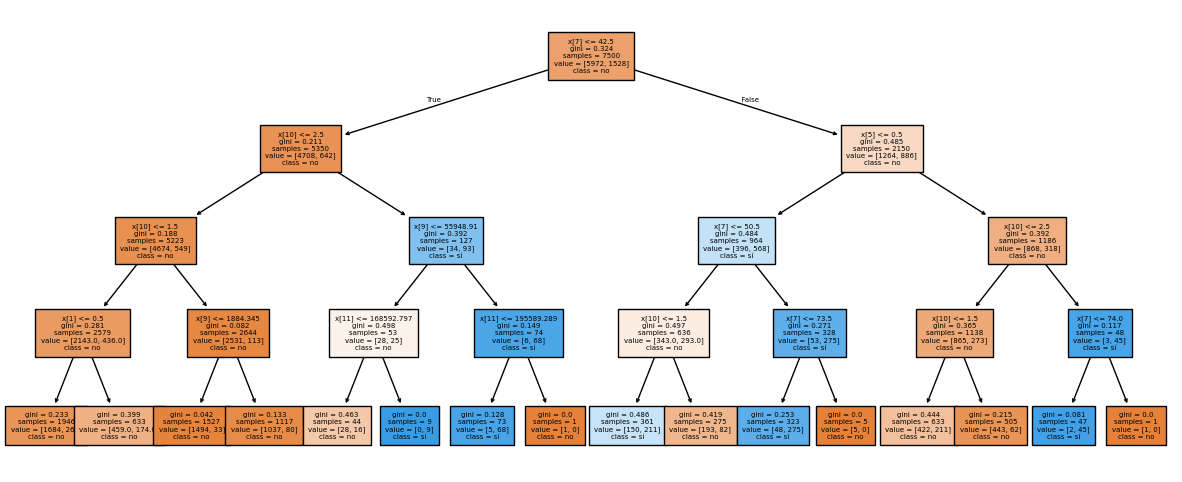

In [39]:
plt.figure(figsize = (15, 6))
plot_tree(decision_arbol, filled = True, class_names = ['no', 'sí'], fontsize = 5);